# Lecture 5

### Sequence Labelling with Hidden Markov Models, Part-of-Speech Tagging


### Garden-Path Sentences
* Garden-Path Sentence - grammatically correct sentence that starts in such a way that the reader's most likely interpretation will be incorrect
* Sometimes, sentences can be grammatically correct but difficult to interpret after initially reading:
    * "The old dog the footsteps of the young"
        * At first glance, "old" is interpreted as an adjective and "dog" as a noun
        * After reading further, you realize that "The old" is the subject of the sentence and "dog" is the verb
    * Thus, reading sequentially initially leads to the wrong interpretation

### Parts-of-Speech
* Classes of words that behave alike:
    * Appear in similar contexts
    * Perform a similar grammatical function in the sentence
    * Undergo similar morphological transformations
    * Have similar meaning
* ~9 traditional parts of speech:
    * noun, pronoun, determiner, adjective, verb, adverb, preposition, conjunction, interjection

### Syntactic Ambiguities and Parts-of-Speech
* "Time flies like an arrow"
    * Time - noun, verb (to time someone)
    * Flies - noun (insect), verb
    * Like - preposition (similar to), verb (to like)
* Assigning different words to a specific part-of-speech dicates the interpretation of a sentence

* Part-of-speech is also important for speech processing:
    * Lead (to lead, V) or lead (element, N)
    * **Ob**ject (item, N) or ob**ject** (to object, V)
    * Con**tent** (to be content, V) or **con**tent (inside, N)
    
* Penn Treebank Tagset - set of part-of-speech tags specific to the English language, used for language processing

### Part of Speech Tagging
* Goal: assign a part-of-speech label to each word in a sentence
* Example of a **sequence labeling** task
* Think of this as a translation task from a sequence of words $(w_1, w_2, ..., w_n) \in V^*$ to a sequence of tags $(t_1, t_2, ..., t_n) \in T^*$. 

* NLP involves translation problems from one structure to another, and the basic solution involves:
    1. Construct the search space of possible translations
    2. Find best paths through this space (decoding) according to some performance measure.

### Bayesian Inference for Sequence Labeling
* Apply Bayesian approach to sequence labeling:
    * Assume each word $w_i$ in the observed sequence $(w_1, w_2, ..., w_n) \in V^*$ was generated by some hidden variable $t_i$
    * Infer the most likely sequence of hidden variables given the sequence of observed words
    
* Use Bayes Rule to figure out what the original input o the channel was (given some noisy output from a channel):

$$ \arg \max_{tags} P(tags | words) = \arg \max_{tags} \frac{P(tags) \cdot P(word | tags)}{P(words)} $$

### Hidden Markov Models (HMMs)
* Generative (Bayesian) probability model
    * Observations: sequences of words
    * Hidden states: sequence of part-of-speech labels
* Hidden sequence is generated by an n-gram language model

$$ P(t_1, t_2, ..., t_n) = \prod_{i = 1}^{n} P(t_i | t_{i - 1})
$$

where $t_o = START$


* Involve 2 types of probabilities: transition probabilities and emission probabilities
    * Transition probability: probability of transitioning from state 1 to state 2
    * Emission probability: probability of observation given current state

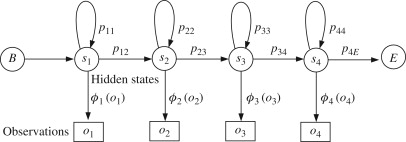



* If the sequence of states is denoted $t_1, t_2, ..., t_n$ and the words observed are denoted $w_1, w_2, ..., w_n$ then the probability of the sequence becomes:

$$ \begin{align} 
P(t_1, t_2, ..., t_n, w_1, w_2, ..., w_n) &= P(t_1 | start)P(w_1 | t_1) \times P(t_2 | t_1)P(w_2 | t_2) \times ... \times P(t_n | t_{n - 1})P(w_n | t_n) \\
&= \prod_{i = 1}^{n} P(t_i | t_{i - 1}) P(w_i | t_i)
\end{align}
$$

### Markov Chains
* Sequence of hidden states follows a **Markov Chain**
* A **Markov Chain** is a sequence of random variables $X_1, X_2, ...$ 
    * The domain of these variables is a set of states
    * **Markov assumption**: next state depends only on current state
    
$$ P(X_{n + 1} | X_1, X_2, ..., X_n) = P(X_{n + 1} | X_n) $$

* A Markov Chain is simply a special case of a weighted finite state automaton (WFSA)

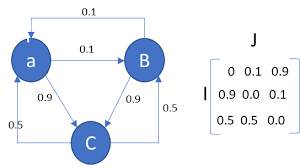

* Assumptions made by the utilization of Markov Chains within Hidden Markov Models:
    * Markov Assumption - probability of each state depends only on the previous state, contrasts the trigram model where 2 words are used as context for the current word
    * Independence of Observations - probabability of the word observed only depends on the current state, does not depend on any of the previous words
    * Modeling syntactic language (sentence structure) but no longer modeling probabilities of wors given specific contexts

### Important Tasks on HMMs
* **Decoding:** given a sequence of words, find the most likely tag sequence, involves Bayesian inference and Viterbi algorithm
* **Evaluation:** given a sequence of words, find the total probability for this word sequence given an HMM, involves forward algorithm
* **Training:** estimate emission and transition probabilities from training data (MLE, forward-backward or Baum-Welch algorithm)

### Decoding HMMs
* Goal: find the path with the highest total probability (given the words)

$$
\arg \max_{t_1, ..., t_n} \prod_{i = 1}^{n} P(t_i | t_{i - 1}) P(w_i | t_i)
$$

There are $d^n$ paths for $n$ words and $d$ tags (exponential time)

### Viterbi Algorithm
* Use the Markov Assumption and **dynamic programming**: only need the probabilities for $X_n$ to compute the probabilities for $X_{n + 1}$


* **Input:** Sequence of observed words $w_1, ..., w_n$
* Create a table $\pi$ such that each entry $\pi[k, t]$ contains the score of the highest-probability sequence ending in tag $t$ at time $k$
* Initialize $\pi[0, start] = 1.0$ and $\pi[0, t] = 0.0$ for all tags $t \in T$

$ \text{for } k = 1, ..., n: \\
  \hspace{1em} \text{for } t \in T: \\
  \hspace{2em} \pi[k, t] = \max_s \pi[k - 1, s] \cdot P(t | s) \cdot P(w_k | t) \\
  \text {return } \max_s \pi[n, s]
$

where $P(t | s)$ is the transition probablity, $P(w_k | t)$ is the emission probability

* For the Trigram Language Model, states instead represent a sequence of 2 states, and transition probabilities represent the probability of a third state given the previous two

### HMMs as Language Models
* We can also use an HMM as a language model and **evaluate** $P(w_1, ..., w_n)$ for a given sentence
* Problem: there are many tag-sequences that could have generated $w_1, ..., w_n$:

$$ P(w_1, ..., w_n, t_1, ..., t_n) = \prod_{i = 1}^n P(t_i | t_{i - 1}) P(w_i | t_i)$$

* Multiple different paths that can be taken to observe the same sequence, thus sum over all of the different paths
* This is an example of **spurious ambiguity**
* Need to compute:

$$ \begin{align}
P(w_1, ..., w_n) &= \sum_{t_1, ..., t_n} P(w_1, ..., w_n, t_1, ..., t_n) \\
&= \sum_{t_1, ..., t_n} \biggl[\prod_{i = 1}^n P(t_i | t_{i - 1} P(w_i | t_i) \biggr]
\end{align}
$$

### Forward Algorithm
* Similar to the Viterbi Algorithm, but take a sum over all different paths rather than taking the max


* **Input:** Sequence of observed words $w_1, ..., w_n$
* Create a table $\pi$ such that each entry $\pi[k, t]$ contains the sum of the probabilities of all tag/word sequences ending in tag $t$ at time $k$ 
* Initialize $\pi[0, start] = 1.0$ and $\pi[0, t] = 0.0$ for all tags $t \in T$

$ \text{for } k = 1, ..., n: \\
  \hspace{1em} \text{for } t \in T: \\
  \hspace{2em} \pi[k, t] = \sum_s \pi[k - 1, s] \cdot P(t | s) \cdot P(w_k | t) \\
  \text {return } \sum_s \pi[n, s]
$

where $P(t | s)$ is the transition probablity, $P(w_k | t)$ is the emission probability

### Named Entity Recognition as Sequence Labeling
* Use 3 tags:
    * O - outside of named entity
    * I - inside named entity
    * B - first word (beginning) of named enity
* B tags are useful, in case 2 named entities are adjacent to each other, then the B tags allow us to distinguish where one entity ends and another begins
* Example: "identification (O) of (O) tectronic (B) acid (I) in (O) ..."